# Exercise 1: Principal Component Analysis

The goal is to apply PCA to a couple of datasets and to understand the results.
The code is written in Python, and it is run on Google Colab.

## Google Colab

Colab is a service that hosts Jupyter notebooks, which provides the computing resources (also GPUs). You don't need to install anything locally, because Colab provides a remote machine that will run your python code.
Jupyter notebooks are files which support both text and code. The code runs in multiple cells, which is very convenient because it let us compartmentalize the script.

## Python

Python is a (very) high-level programming language, which is interpreted at run-time instead of being compiled. This means that we can run the code without needing to compile it first.
Python is very popular in machine learning because it offers a huge number of libraries that we can use to build machine-learning and deep learning models. Also, it is a dynamically typed language, meaning that we do not need to define the type of variable before assignment.

### A brief intro to Python

In [2]:
# create some variables
a = 3.2 # this is a float
b = 'test' # this is a string
c = [1, 2, 3] # this is a list

print(type(a))

<class 'float'>


In [ ]:
# do some math

a = 3.2
b = 7.4

c = a * b # multiplication
d = a/b # division
e = a**b # exponentiation

## Numpy

Everything that we do in machine learning is linear algebra (matrix multiplication). Numpy is a python library specialized for operations on arrays (vectors, matrices and N-dimensional tensors). Numpy is widely used, and it is pre-installed on Colab.

In [5]:
# import the library
import numpy as np

# create a 1D array (vector)
array1 = np.array([1.1, 2.2, 3.3])
print(array1)

# create a 2D array (matrix)
array2 = np.array([[1.1, 2.2],
                   [3.3, 4.4]])
print(array2)

[1.1 2.2 3.3]
[[1.1 2.2]
 [3.3 4.4]]


In [6]:
# check the shape of the arrays
print(array1.shape)
print(array2.shape)

(3,)
(2, 2)


In [ ]:
# perform some multiplications
array3 = np.array([[2.3, 4.9],
                  [3.2, 5.4],
                  [1.8, 4.5]])

result = array3 @ array2 # matrix multiplication
print(result)

In [ ]:
# access the value of the arrays or store values

k1 = array1[0]
print(k1)

array1[2] = 0
print(array1)

k2 = array3[2, 1]
print(k2)

k3 = array3[:, 0]
print(k3)

## Cycles and functions

The command `for` is used to create a cycle, while the command `def` is used to define a function.

In [ ]:
# For cycle
for i in range(10):
    print(i)

In [ ]:
# Define functions

def multip(a, b):
    temp = a*b

    return temp

a = 10
b = 3

print(multip(a, b))

## Matplotlib

Another useful python library is Matplotlib, which is used to visualize the data. Like Numpy, Matplotlib is widely used and it is generally pre-installed.

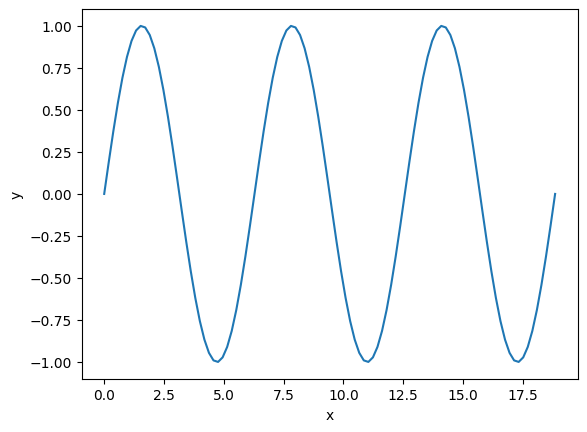

In [7]:
import matplotlib.pyplot as plt

x = np.linspace(0, 6*np.pi, 100) # this is used to create an array from 0 to 6pi containing 100 points regularly spaced
y = np.sin(x) # compute the sine of x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercise 1: toy dataset

We want to test PCA on a toy dataset. The dataset contains 2 variables $x$ and $y$. The second variable is a linear function of the first one, but it is corrupted with Gaussian noise. PCA should be able to identify the direction of maximum variance (the first PC) and relegate the noise in the last PC.

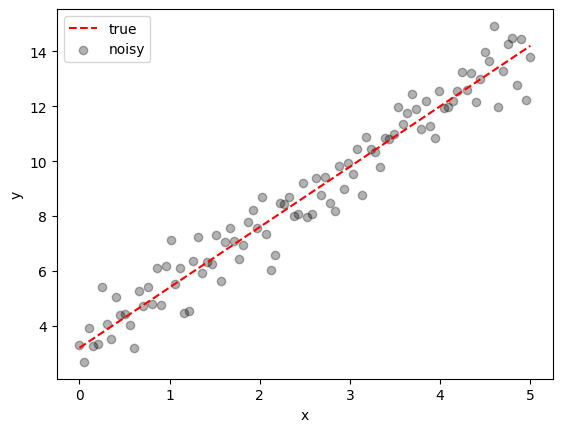

In [8]:
# create the x and y variables

n_points = 100
n_variables = 2

x = np.linspace(0, 5, n_points)
y_true = 3.2 + 2.2*x

rng = np.random.default_rng(121421321)
noise = rng.normal(loc=0, scale=0.75, size=n_points)
y_noise = y_true + noise

plt.plot(x, y_true, c='r', ls='--', label='true')
plt.scatter(x, y_noise, c='k', alpha=0.3, label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
# create the dataset

D = np.zeros((n_points, n_variables)) # empty matrix

# this operation is called slicing and it is used to put or extract values from an array
D[:, 0] = x # put x in the first column (0) of the array
D[:, 1] = y_noise

print(D.shape)


(100, 2)


## PCA algorithm

To find the PCs, we need to follow these steps:
- Center and scale the dataset:
\begin{equation}
\mathbf{D}_0 = (\mathbf{D} - \mathbf{D}_{\mu})\mathbf{D}^{-1}_{\sigma}
\end{equation}


- Compute the covariance matrix:
\begin{equation}
\mathbf{K} = \mathbf{D}_0^T\mathbf{D}_0
\end{equation}

- Compute the eigendecomposition of the covariance matrix:
\begin{equation}
\mathbf{K} = \mathbf{A} \mathbf{L} \mathbf{A}^T
\end{equation}

- Sort the eigenvectors in descending order of eigenvalues.

- Transform the scaled dataset:
\begin{equation}
\mathbf{Z} = \mathbf{D}_0 \mathbf{A}
\end{equation}

- The original dataset can be reconstructed as:

\begin{equation}
\mathbf{D} = (\mathbf{Z} \mathbf{A}^T)\mathbf{D}_{\sigma} + \mathbf{D}_{\mu}
\end{equation}

[[-1.71481604 -1.66754697]
 [-1.68017329 -1.85365028]
 [-1.64553055 -1.47199321]
 [-1.6108878  -1.67451724]
 [-1.57624505 -1.65347719]
 [-1.5416023  -1.01255202]
 [-1.50695955 -1.43091157]
 [-1.4723168  -1.60080116]
 [-1.43767406 -1.1293784 ]
 [-1.40303131 -1.33114168]
 [-1.36838856 -1.31930127]
 [-1.33374581 -1.4421728 ]
 [-1.29910306 -1.69384107]
 [-1.26446031 -1.05730871]
 [-1.22981757 -1.22188752]
 [-1.19517482 -1.01395122]
 [-1.16053207 -1.19943137]
 [-1.12588932 -0.79517376]
 [-1.09124657 -1.21255952]
 [-1.05660382 -0.7804444 ]
 [-1.02196108 -0.4833986 ]
 [-0.98731833 -0.98001379]
 [-0.95267558 -0.79514548]
 [-0.91803283 -1.31047481]
 [-0.88339008 -1.28652407]
 [-0.84874733 -0.72081474]
 [-0.81410459 -0.4538635 ]
 [-0.77946184 -0.862176  ]
 [-0.74481909 -0.73859757]
 [-0.71017634 -0.75694979]
 [-0.67553359 -0.42590853]
 [-0.64089084 -0.94185477]
 [-0.6062481  -0.50734068]
 [-0.57160535 -0.35202703]
 [-0.5369626  -0.49946098]
 [-0.50231985 -0.70523506]
 [-0.4676771  -0.5458942 ]
 

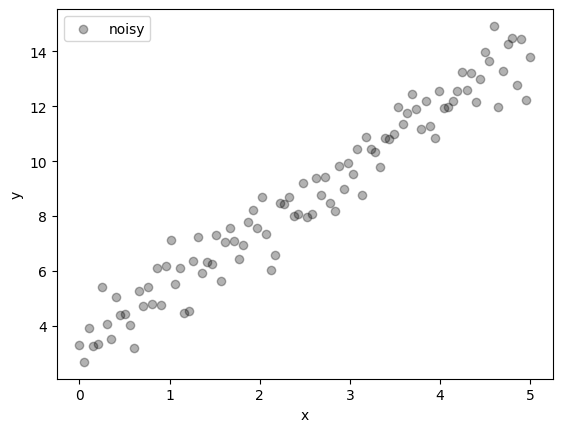

In [18]:
# To do: center and scale the dataset

n_points = 100
n_variables = 2

# D_s needs to be square

# - Create two empty matrices D_m and D_s with the command np.zeros()
D_m = np.zeros((n_points, n_variables)) # empty matrix
# D_m = np.zeros-like(D) is also possible
D_s = np.zeros((n_variables, n_variables))
# - Store the mean and the standard deviations in the matrix using a for loop
# - Compute the mean and the standard deviation using np.mean() and np.std()

## D_m is a matrix with 2 column with the mean repeated
## D_s is a diagonal matrix
for i in range(n_variables):
  D_m[:, i] = np.mean(D[:, i])
  D_s[i, i] = np.std(D[:, i])

# - Compute the inverse of D_s using np.linalg.inv()
# D_s needs to be square
D_s_inv = np.linalg.inv(D_s)
# - Use the command @ to multiply the matrices

D_0 = (D - D_m) @ D_s_inv

print(D_0)
#plot
plt.scatter(D[:, 0], D[:, 1], c='k', alpha=0.3, label='noisy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
# - Compute the inverse of D_s using np.linalg.inv()
# Hints:
# - Create two empty matrices D_m and D_s with the command np.zeros()
# - Store the mean and the standard deviations in the matrix using a for loop
# - Compute the mean and the standard deviation using np.mean() and np.std()
# - Compute the inverse of D_s using np.linalg.inv()
# - Use the command @ to multiply the matrices

In [16]:
# To do: compute the covariance matrix
# - Use the function np.transpose() to transpose the matrix
D_0_T = np.transpose(D_0)

K = D_0_T @ D_0
print(K)
# Hint:
# - Use the function np.transpose() to transpose the matrix

[[100.          97.40206298]
 [ 97.40206298 100.        ]]


In [20]:
# To do: compute the eigendecomposition of the covariance matrix and sort the eigenvalues and eigenvectors in decreasing order
l, A = np.linalg.eig(K)
index_sort = np.argsort(l)[::-1]
l = l[index_sort]
A = A[:, index_sort]

L = np.diag(l)
print(L)
# Hint:
# - Use the function np.linalg.eig() to compute the eigendecomposition
# - Use np.argsort() to sort the eigenvectors


[[197.40206298   0.        ]
 [  0.           2.59793702]]


In [22]:
# To do: compute the transformed dataset
Z = D_0 @ A
print(Z.shape)

(100, 2)


[[4.44089210e-16 3.29171866e+00]
 [5.05050505e-02 2.68714827e+00]
 [1.01010101e-01 3.92698957e+00]
 [1.51515152e-01 3.26907523e+00]
 [2.02020202e-01 3.33742540e+00]
 [2.52525253e-01 5.41951836e+00]
 [3.03030303e-01 4.06044632e+00]
 [3.53535354e-01 3.50854738e+00]
 [4.04040404e-01 5.03999919e+00]
 [4.54545455e-01 4.38455619e+00]
 [5.05050505e-01 4.42302067e+00]
 [5.55555556e-01 4.02386337e+00]
 [6.06060606e-01 3.20630033e+00]
 [6.56565657e-01 5.27412293e+00]
 [7.07070707e-01 4.73947646e+00]
 [7.57575758e-01 5.41497296e+00]
 [8.08080808e-01 4.81242693e+00]
 [8.58585859e-01 6.12568776e+00]
 [9.09090909e-01 4.76977915e+00]
 [9.59595960e-01 6.17353717e+00]
 [1.01010101e+00 7.13851249e+00]
 [1.06060606e+00 5.52522121e+00]
 [1.11111111e+00 6.12577963e+00]
 [1.16161616e+00 4.45169406e+00]
 [1.21212121e+00 4.52949984e+00]
 [1.26262626e+00 6.36724854e+00]
 [1.31313131e+00 7.23445946e+00]
 [1.36363636e+00 5.90802601e+00]
 [1.41414141e+00 6.30947971e+00]
 [1.46464646e+00 6.24986115e+00]
 [1.515151

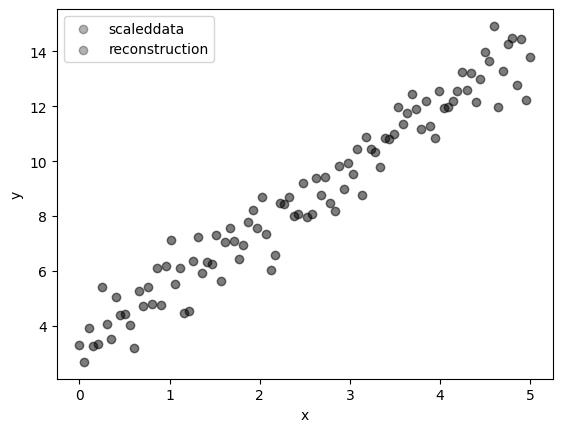

In [29]:
# To do: reconstruct the dataset
D_rec = Z @ A.T @ D_s + D_m
print(D_rec)
#plot
plt.scatter(D[:, 0], D[:, 1], c='k', alpha=0.3, label='scaleddata')
plt.scatter(D_rec[:, 0], D_rec[:, 1], c='k', alpha=0.3, label='reconstruction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

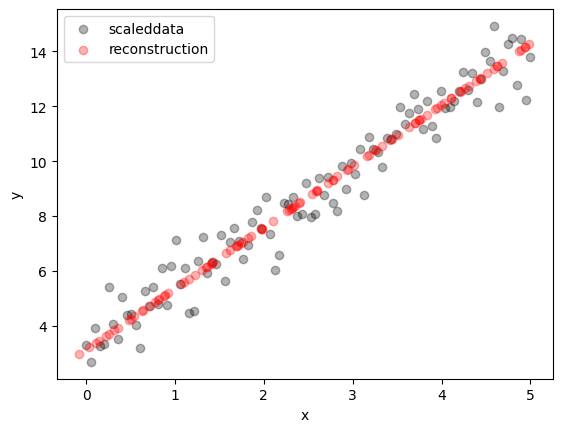

In [32]:
# To do:
# - compress the dataset by removing the last PC,
# - reconstruct the dataset with the compressed representation

q = 1
Aq = A[:, :q]
Zq = Z[:, :q]
D_rec = (Zq @ Aq.T) @ D_s + D_m

plt.scatter(D[:, 0], D[:, 1], c='k', alpha=0.3, label='scaleddata')
plt.scatter(D_rec[:, 0], D_rec[:, 1], c='r', alpha=0.3, label='reconstruction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [ ]:
# To do: create a python function that takes the data as input and computes the PCA, returning Z, L, A as output

## Singular value decomposition

The PCA can be computed also by applying the SVD to the dataset:
\begin{equation}
\mathbf{D}_0 = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T
\end{equation}

in which:
- $\mathbf{A} = \mathbf{V}$,
- $\mathbf{L} = \boldsymbol{\Sigma}^2$,
- $\mathbf{u}_i = \frac{\mathbf{z}_i}{||\mathbf{z}_i||}$

In [35]:
# To do: check if this is true
U, s , Vt = np.linalg.svd(D_0, full_matrices=False)

V = Vt.T

print(A)
print(V)

print(L)
print(np.diag(s)**2)
# Hint:
# - Use np.linalg.svd(D0, full_matrices=False) to compute the svd


[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[197.40206298   0.        ]
 [  0.           2.59793702]]
[[197.40206298   0.        ]
 [  0.           2.59793702]]


## Scikit-learn

Scikit-learn is a python library that contains many machine-learning models, including PCA. It can also handle centering and scaling more naturally. However, we need to install it first because it is not included in Colab.

In [33]:
! pip install scikit-learn

In [39]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# To do: use sklearn to compute PCA

scalar = StandardScaler()
D_0 = scalar.fit_transform(D)
D_std = scalar.transform(D)
pca = PCA(n_components=1)
pca.fit(D_0)

A = pca.components_.T
Z = D_0 @ A
ex_var =  pca.explained_variance_ratio_

print(ex_var)

# Hint:
# - Use StandardScaler to center and scale the data

[0.98701031]


## A more complex example

We now want to apply PCA to the "wine dataset". This dataset contains 178 samples with 13 different features. All the wines are categorized in 3 classes.

In [41]:
# Import the dataset
from sklearn.datasets import load_wine

wine_data = load_wine().data
n_samples, n_features = wine_data.shape

wine_features = load_wine().feature_names
wine_classes = load_wine().target

print(wine_data.shape)
print(wine_features)
print(wine_classes)

(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


<ipython-input-45-2d738dd07fa6>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


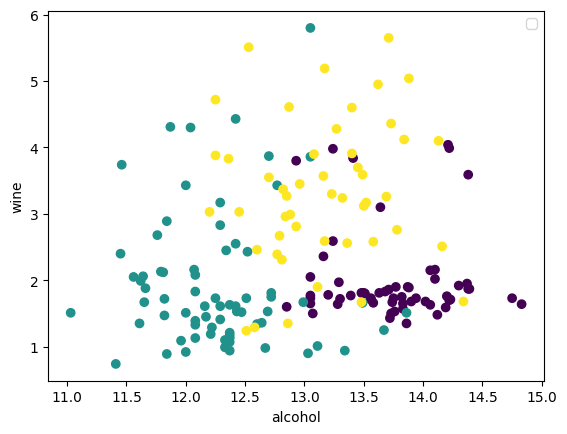

In [45]:
# To do: visualize the dataset
alcohol = wine_data[:, 0]
malic_acid = wine_data[:, 1]

plt.scatter(alcohol, malic_acid, c=wine_classes)
plt.xlabel('alcohol')
plt.ylabel('wine')
plt.legend()
plt.show()
# Hint:
# - Use plt.scatter() to plot the distribution of 'alcohol' and 'malic_acid'
# - Color the scatter using wine_classes


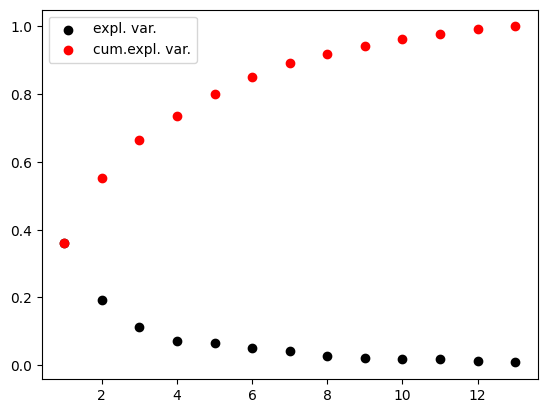

In [46]:
# To do: compute the PCA and show the distribution of the explained variance

scaler = StandardScaler()
D_0 = scaler.fit_transform(wine_data)

pca = PCA(n_components=n_features)
pca.fit(D_0)

A = pca.components_.T
Z = D_0 @ A
ex_var = pca.explained_variance_ratio_
cum_ex_var = np.cumsum(ex_var)

plt.scatter(1+ np.arange(n_features), ex_var, c='k', label='expl. var.')
plt.scatter(1+ np.arange(n_features), cum_ex_var, c='r', label='cum.expl. var.')
plt.legend()
plt.show()



# Hint:
# - Use pca.explained_variance_ratio_ to get the explained variance
# - Use np.cumsum() to compute the cumulative variance

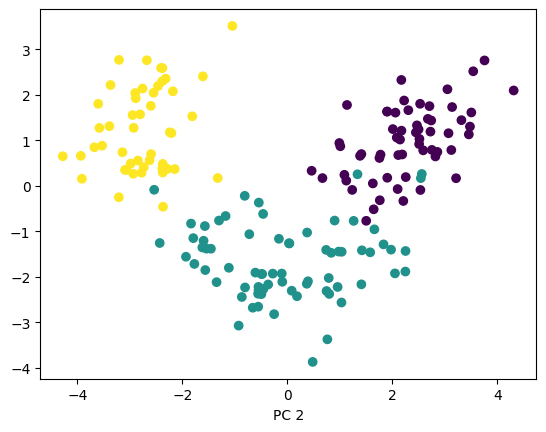

In [47]:
# To do: visualize the first 2 PCs and color them by the wine class
plt.scatter(Z[:, 0], Z[:, 1], c=wine_classes)
plt.xlabel('PC 1')
plt.xlabel('PC 2')
plt.show()

In [ ]:
# To do: visualise the scores of the PCs

# Hint:
# - Use plt.bar() to plot a bar plot

## Outlier detection

We can use PCA to detect probable outliers in a dataset. We consider a toy dataset containing 2 features ($x$ and $y$) and 100 samples. For the first 95 samples, $x$ is in the range $[0, 10]$ and $y = 4x + 2 + \epsilon$, where $\epsilon$ is Gaussian noise with $\mu = 0 $ and $\sigma = 2.5$. The last 5 points are outliers with $x_{\mathrm{out}}$ is in the range $[2, 3]$ and $y_{\mathrm{out}} = 3 x^2 + x + 10 + \epsilon_{\mathrm{out}}$, where $\epsilon_{\mathrm{out}}$ is Gaussian noise with $\mu_{\mathrm{out}} = 0 $ and $\sigma_{\mathrm{out}} = 5$

In [ ]:
# First we import the libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# To do:
# - create 95 correct samples with x in range [0, 10] and y = 4*x + 2 + noise
# - create 5 outliers with x_outl in range [2, 3] and y_outl = 3*x_outl**2 + x_outl + 10 + noise_outl


# Hint:
# - to create a evenly spaced array, you can use the function np.linspace(start, stop, n_points)
# - to create the noise array, you can use the function np.random.normal(mu, sigma, size=n_points)

# this command is used to set a fixed seed for random sampling,
# so that we have the same result when re-running the code.
np.random.seed(1)

In [ ]:
# To do:
# - Create an empty matrix D of size (n_points + n_outl, 2)
# - Put the true values and the outliers in the matrix, using column 0 for x and column 1 for y

# Hint:
# - You can use the function np.empty((n, 2)) to create an empty matrix
# - You can use np.concatenate([a, b]) to concatenate vector a and b


In [ ]:
from sklearn.decomposition import PCA

# To do:
# - Center and scale the matrix D
# - Perform PCA
# - Plot the scores

# Hints:
# - To center the matrix D, subtract the mean of each column from each column
# - To scale the matrix D, divide each column of the centered matrix by the standard deviation of each column

To find the outliers, we build a classifier using the 2nd PC. To do that, we compute the empirical cumulative distribution function (ecdf) of PC scores squared divided by the corresponding eigenvalue (Mahalanobis distance):

\begin{equation}
d_{M, i} = \frac{z^2_{i,2}}{l_2}
\end{equation}

\begin{equation}
\mathrm{edfc}(t) = \sum_{j = 1}^k d_{M, j} < t
\end{equation}

In [ ]:
# To do:
# - Calculate the Mahalanobis distance using PC2
# - Compute the cumulative distribution
# - Set a threshold

def ecdf(pc):
    i_sort = np.argsort(pc)
    pc_sort = pc[i_sort]
    dist_sort = np.arange(1, pc_sort.size+1)/pc_sort.size
    return i_sort, pc_sort, dist_sort

# i_sort, pc2_sort, dist_sort = ecdf(dm_pc2)
# threshold = 0.95

In [ ]:
# To do:
# - Apply the threshold to find the outliers